In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import model_selection

# assessment
from sklearn import model_selection # for model comparisons
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

# algorithms
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import cohen_kappa_score

# data preprocessing / feature selection

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

from sklearn.metrics import confusion_matrix
import seaborn as sns

## 1)

In [2]:
data=pd.read_csv('winequality-white.csv')
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [3]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

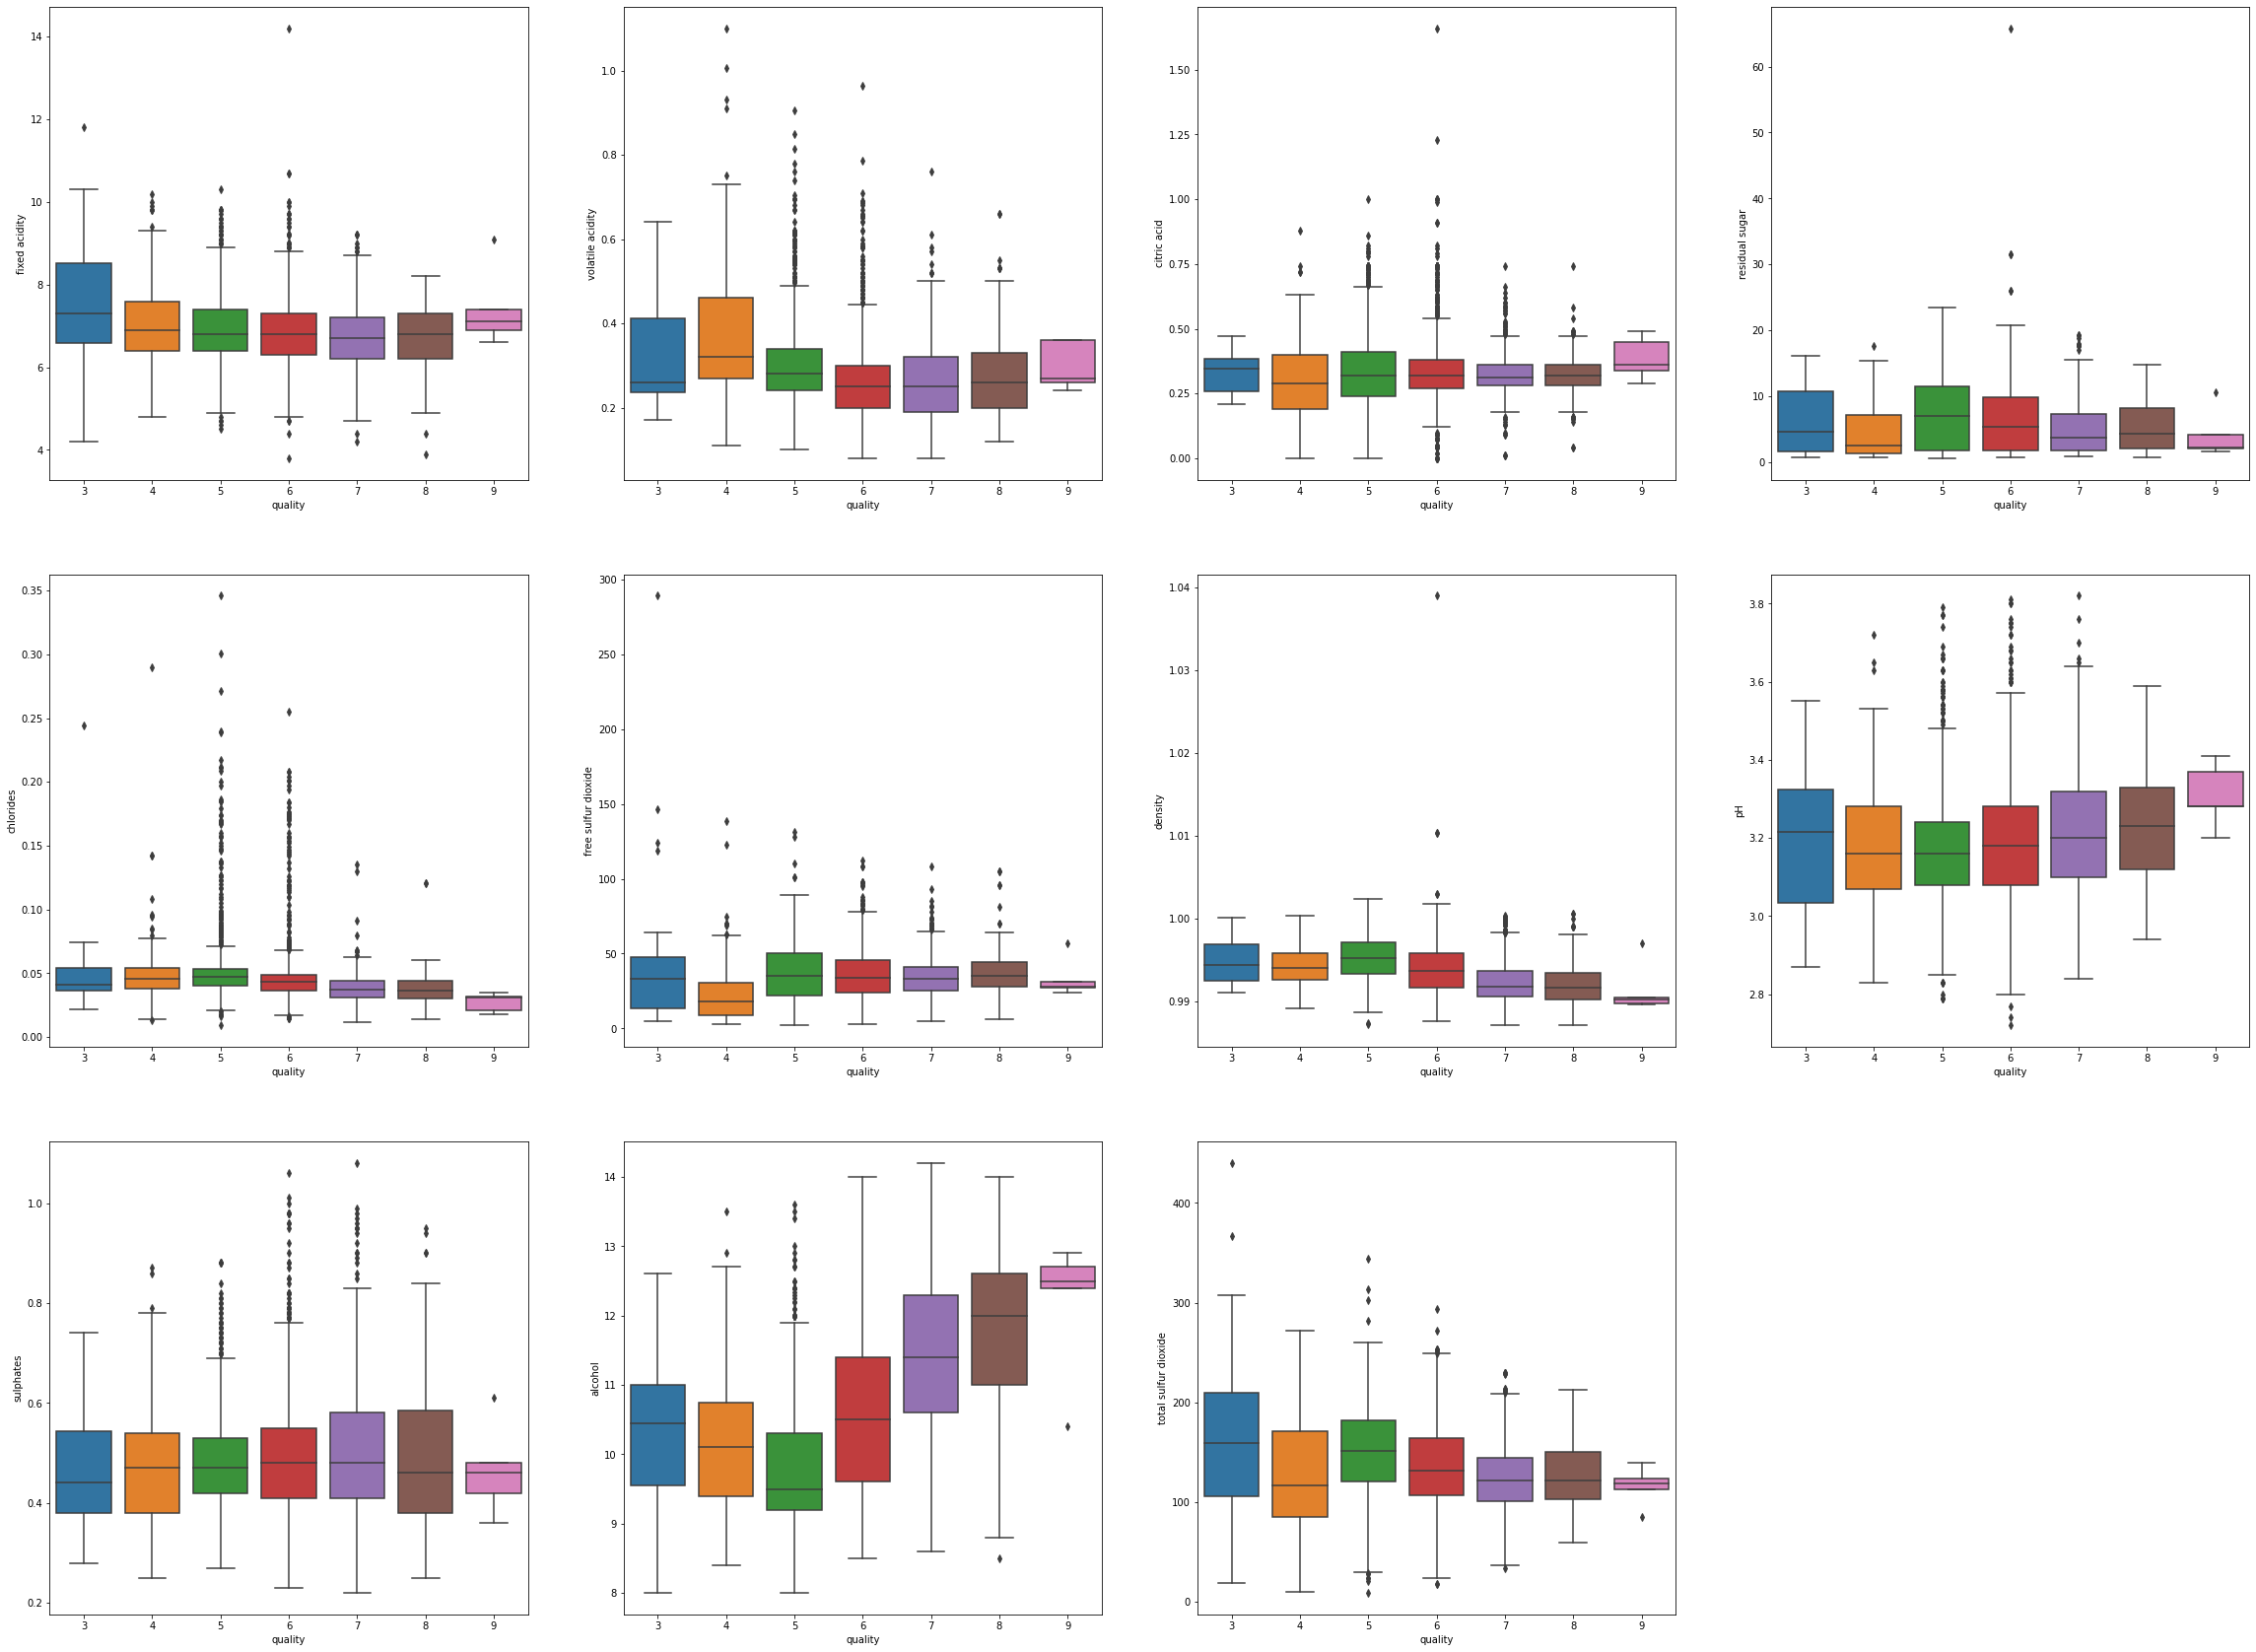

In [4]:
plt.figure(figsize=(40,30))
plt.subplot(3,4,1)
sb.boxplot(x='quality', y='fixed acidity', data=data)
plt.subplot(3,4,2)
sb.boxplot(x='quality', y='volatile acidity', data=data)
plt.subplot(3,4,3)
sb.boxplot(x='quality', y='citric acid', data=data)
plt.subplot(3,4,4)
sb.boxplot(x='quality', y='residual sugar', data=data)
plt.subplot(3,4,5)
sb.boxplot(x='quality', y='chlorides', data=data)
plt.subplot(3,4,6)
sb.boxplot(x='quality', y='free sulfur dioxide', data=data)
plt.subplot(3,4,7)
sb.boxplot(x='quality', y='density', data=data)
plt.subplot(3,4,8)
sb.boxplot(x='quality', y='pH', data=data)
plt.subplot(3,4,9)
sb.boxplot(x='quality', y='sulphates', data=data)
plt.subplot(3,4,10)
sb.boxplot(x='quality', y='alcohol', data=data)
plt.subplot(3,4,11)
sb.boxplot(x='quality', y='total sulfur dioxide', data=data)


from the plot above, we can kind of predict that wine that has more alcohol content will have higher quality

#### spliting data into testing and training data

In [5]:
y=data["quality"]
x = data.drop(['quality'], axis=1)

In [6]:
test_pct = 0.20
seed = 7
X_train, X_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=test_pct, random_state=seed)

## 2)

In [7]:
# Decision Tree
scoring = 'f1_macro'
print('Tuning model...')
selected_model = DecisionTreeClassifier()
hyperparameters = {'max_depth':[5, 6, 7], 'criterion':['gini', 'entropy'] }
clf = GridSearchCV(selected_model, hyperparameters, cv=5, scoring=scoring)
clf.fit(X_train, y_train)
print("Best hyperparameters found on development set for Decision Tree:")
print(clf.best_params_)
tuned_model_DT = clf.best_estimator_

print(f'Decision tree has maximum depth {tuned_model_DT.tree_.max_depth}.')
y_pred = tuned_model_DT.predict(X_test)
print( 'f1_score is')
print( f1_score(y_test, y_pred, average='macro') )

Tuning model...


/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Best hyperparameters found on development set for Decision Tree:
{'criterion': 'entropy', 'max_depth': 7}
Decision tree has maximum depth 7.
f1_score is
0.28389162698416776


In [8]:
# Random Forest
print('Tuning model...')
selected_model = RandomForestClassifier()
hyperparameters = {'max_depth':[3, 4, 5], 'criterion':['gini', 'entropy'], 'n_estimators':[10, 50, 100] }
clf = GridSearchCV(selected_model, hyperparameters, cv=5, scoring=scoring)
clf.fit(X_train, y_train)
print("Best hyperparameters found on development set for Random Forest:")
print(clf.best_params_)
tuned_model_RF = clf.best_estimator_

y_pred = tuned_model_RF.predict(X_test)
print( 'f1_score is')
print( f1_score(y_test, y_pred, average='macro') )

Tuning model...


/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Best hyperparameters found on development set for Random Forest:
{'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 100}
f1_score is
0.21649194794974846


## 3)

In [9]:
param_grid = {'C': [0.1,1],'kernel': [ 'linear']}

In [10]:
grid = GridSearchCV(svm.SVC(),param_grid, verbose=2, scoring= scoring)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


[CV] END ...............................C=0.1, kernel=linear; total time=  49.5s
[CV] END ...............................C=0.1, kernel=linear; total time=  50.1s
[CV] END ...............................C=0.1, kernel=linear; total time=  51.0s
[CV] END ...............................C=0.1, kernel=linear; total time=  50.0s
[CV] END ...............................C=0.1, kernel=linear; total time=  48.1s
[CV] END .................................C=1, kernel=linear; total time= 1.7min
[CV] END .................................C=1, kernel=linear; total time= 1.6min
[CV] END .................................C=1, kernel=linear; total time= 1.5min
[CV] END .................................C=1, kernel=linear; total time= 1.3min
[CV] END .................................C=1, kernel=linear; total time= 1.5min


GridSearchCV(estimator=SVC(), param_grid={'C': [0.1, 1], 'kernel': ['linear']},
             scoring='f1_macro', verbose=2)

In [11]:
tune_linear_SVM=grid.best_estimator_
y_pred= tune_linear_SVM.predict(X_test)

print("Best hyperparameters found on development set for linear SVM:")
print(tune_linear_SVM)
print( 'f1_score is')
print( f1_score(y_test, y_pred, average='macro') )

Best hyperparameters found on development set for linear SVM:
SVC(C=0.1, kernel='linear')
f1_score is
0.171159204890446


In [12]:
param_grid2 = {'C': [0.1,1], 'gamma':[0.1,1],'kernel': ['sigmoid']}

grid2 = GridSearchCV(svm.SVC(),param_grid2, verbose=2, scoring= scoring)
grid2.fit(X_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


[CV] END ...................C=0.1, gamma=0.1, kernel=sigmoid; total time=   0.5s
[CV] END ...................C=0.1, gamma=0.1, kernel=sigmoid; total time=   0.4s
[CV] END ...................C=0.1, gamma=0.1, kernel=sigmoid; total time=   1.0s
[CV] END ...................C=0.1, gamma=0.1, kernel=sigmoid; total time=   1.4s
[CV] END ...................C=0.1, gamma=0.1, kernel=sigmoid; total time=   0.6s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.5s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.4s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.5s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.6s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.5s
[CV] END .....................C=1, gamma=0.1, kernel=sigmoid; total time=   0.5s
[CV] END .....................C=1, gamma=0.1, kernel=sigmoid; total time=   0.5s
[CV] END ...................

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1], 'gamma': [0.1, 1],
                         'kernel': ['sigmoid']},
             scoring='f1_macro', verbose=2)

In [13]:
tune_sigmoid_SVM=grid2.best_estimator_
y_pred= tune_sigmoid_SVM.predict(X_test)

print("Best hyperparameters found on development set for sigmoid SVM:")
print(tune_sigmoid_SVM)
print( 'f1_score is')
print( f1_score(y_test, y_pred, average='macro') )

Best hyperparameters found on development set for sigmoid SVM:
SVC(C=0.1, gamma=0.1, kernel='sigmoid')
f1_score is
0.09072821329088739


## 4,5)

In [14]:
# Chose the Algorithms

seed = 42 # setting the seed allows for repeatability

print('Reading list of algorithms to train ...')
models = []

models.append(( 'scaled_SVM with sigmoid kernel', make_pipeline( MinMaxScaler(), svm.SVC(C=0.1, gamma=0.1,kernel= 'sigmoid') )  ))
models.append(( 'PCA with sigmoid kernel', make_pipeline( PCA(), svm.SVC(C=0.1, gamma=0.1,kernel= 'sigmoid') )  ))\

models.append(( 'scaled_SVM with linear kernel', make_pipeline( MinMaxScaler(), svm.SVC(C=0.1, kernel='linear') )  ))
models.append(( 'PCA with linear kernel', make_pipeline( PCA(), svm.SVC(C=0.1, kernel='linear') )  ))

Reading list of algorithms to train ...


In [15]:
# Now it is time to train some models on the data and estimate their accuracy on unseen data.

k4folds = 5
results = []
names = []
for name, model in models:   # Select each model in turn
    print(" ++ NOW WORKING ON ALGORITHM %s ++" % name)
    print("Splitting data into %s folds" % k4folds)
    kfold = model_selection.KFold(n_splits=k4folds, random_state=seed, shuffle=True)
    print("Training model on each split ...")
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "algorithm %s %s results: mean = %f (std = %f)" % (name, scoring, cv_results.mean(), cv_results.std())
    print(msg)
    
print('done \n')

 ++ NOW WORKING ON ALGORITHM scaled_SVM with sigmoid kernel ++
Splitting data into 5 folds
Training model on each split ...
algorithm scaled_SVM with sigmoid kernel f1_macro results: mean = 0.096674 (std = 0.006693)
 ++ NOW WORKING ON ALGORITHM PCA with sigmoid kernel ++
Splitting data into 5 folds
Training model on each split ...
algorithm PCA with sigmoid kernel f1_macro results: mean = 0.158192 (std = 0.012442)
 ++ NOW WORKING ON ALGORITHM scaled_SVM with linear kernel ++
Splitting data into 5 folds
Training model on each split ...
algorithm scaled_SVM with linear kernel f1_macro results: mean = 0.166031 (std = 0.008867)
 ++ NOW WORKING ON ALGORITHM PCA with linear kernel ++
Splitting data into 5 folds
Training model on each split ...
algorithm PCA with linear kernel f1_macro results: mean = 0.185583 (std = 0.013820)
done 



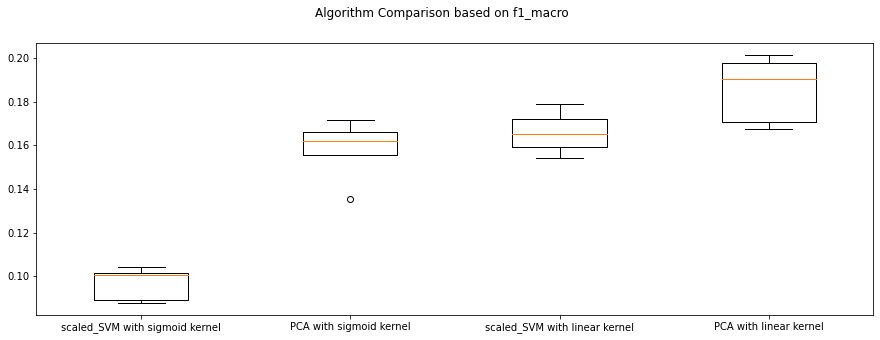

In [16]:
# Compare Algorithms
fig = plt.figure(figsize=(15,5))
fig.suptitle('Algorithm Comparison based on %s' % scoring)
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

 ++++ Detailed classification report for the selected model ++++ 
Algorithm: Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())]) 
This model was trained and tuned on the development set using CV.
The following results are computed on the separate test set:


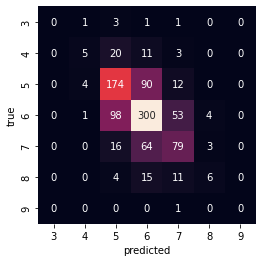


 clasification report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.45      0.13      0.20        39
           5       0.55      0.62      0.58       280
           6       0.62      0.66      0.64       456
           7       0.49      0.49      0.49       162
           8       0.46      0.17      0.24        36
           9       0.00      0.00      0.00         1

    accuracy                           0.58       980
   macro avg       0.37      0.29      0.31       980
weighted avg       0.56      0.58      0.56       980

Cohen Kappa Score: 0.34880288540636717


done 



/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
# Make predictions on test dataset
selected_model = make_pipeline( MinMaxScaler(),KNeighborsClassifier() ) 
selected_model.fit(X_train, y_train)
predictions = selected_model.predict(X_test)
print(" ++++ Detailed classification report for the selected model ++++ " )
print("Algorithm: %s " % selected_model)
print("This model was trained and tuned on the development set using CV.")
print("The following results are computed on the separate test set:")
#
predictions = selected_model.predict(X_test)
cm = confusion_matrix(y_test, predictions)
df_cm = pd.DataFrame(cm, columns=np.unique(y_test), index = np.unique(y_test))
sns.heatmap(df_cm, square=True, annot=True, fmt='d', cbar=False )
plt.xlabel('predicted')
plt.ylabel('true')
plt.show()
#
print('\n clasification report:\n', classification_report(y_test, predictions))
print('Cohen Kappa Score:', cohen_kappa_score(y_test, predictions))
print('\n')        
print('done \n')